<img src="../img/Logo.png" width="300">

# Filtros en las CNN - P3
## Computer Vision

### Profesor: Jorge Calvo

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Definir los kernels
kernels = [
    np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),    # Kernel 1
    np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]),    # Kernel 2
    np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),    # Kernel 3
]

# Cargar la imagen
image_path = '../images/gioconda.jpg'
image = plt.imread(image_path)

In [48]:
# Convertir la imagen a un tensor de TensorFlow
image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
image_tensor = tf.expand_dims(image_tensor, axis=0)  # Agregar una dimensión para el batch

# Definir la red convolucional
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3),  activation='tanh', padding="same", strides=(2,2),input_shape=image.shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
])

In [49]:
plot_model(model, to_file='./red_convolucional.png', show_shapes=True, show_layer_names=True, dpi=96)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [50]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 184, 327, 3)       84        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 92, 163, 3)        0         
 ng2D)                                                           
                                                                 
Total params: 84 (336.00 Byte)
Trainable params: 84 (336.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Aplicar los kernels a la imagen
filtered_images = []
for kernel in kernels:
    # Crear una copia del modelo para evitar problemas con los pesos compartidos
    model_copy = tf.keras.models.clone_model(model)
    
    # Configurar los pesos del modelo con el kernel actual
    weights = np.zeros((3, 3, 3, 3))
    for i in range(3):
        weights[:, :, i, i] = kernel
    model_copy.set_weights([weights, np.zeros(3)])

    # Aplicar la convolución
    filtered_image = model_copy.predict(image_tensor)[0]
    filtered_images.append(filtered_image)

1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


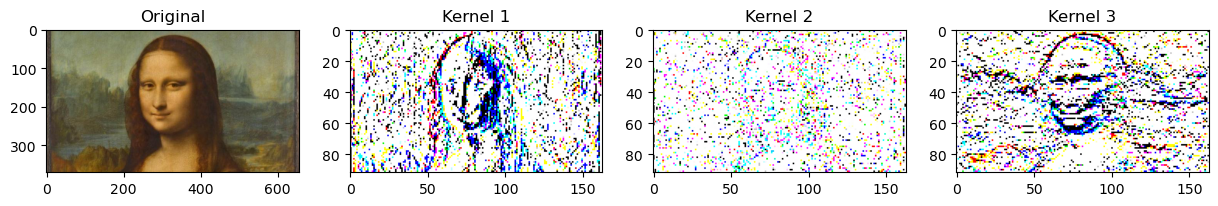

In [52]:
# Mostrar las imágenes filtradas
titles = ['Kernel 1', 'Kernel 2', 'Kernel 3']
fig, axes = plt.subplots(1, len(filtered_images) + 1, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original')
for i, filtered_image in enumerate(filtered_images):
    axes[i + 1].imshow(filtered_image)
    axes[i + 1].set_title(titles[i])
plt.show()
